###**Importing Libraries**

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

### **Importing Dataset**

In [281]:
load_dataset = load_iris()
dataset = pd.DataFrame(load_dataset.data, columns = load_dataset.feature_names)
dataset['target'] = load_dataset.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **Dataset Inspection**

In [282]:
dataset.shape

(150, 5)

In [283]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [284]:
dataset.duplicated().value_counts()

False    149
True       1
Name: count, dtype: int64

In [285]:
dataset["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [286]:
dataset["target"].unique()

array([0, 1, 2])

In [287]:
dataset[["petal width (cm)", "petal length (cm)", "sepal width (cm)", "sepal length (cm)"]].nunique()

petal width (cm)     22
petal length (cm)    43
sepal width (cm)     23
sepal length (cm)    35
dtype: int64

### **EDA**

In [288]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


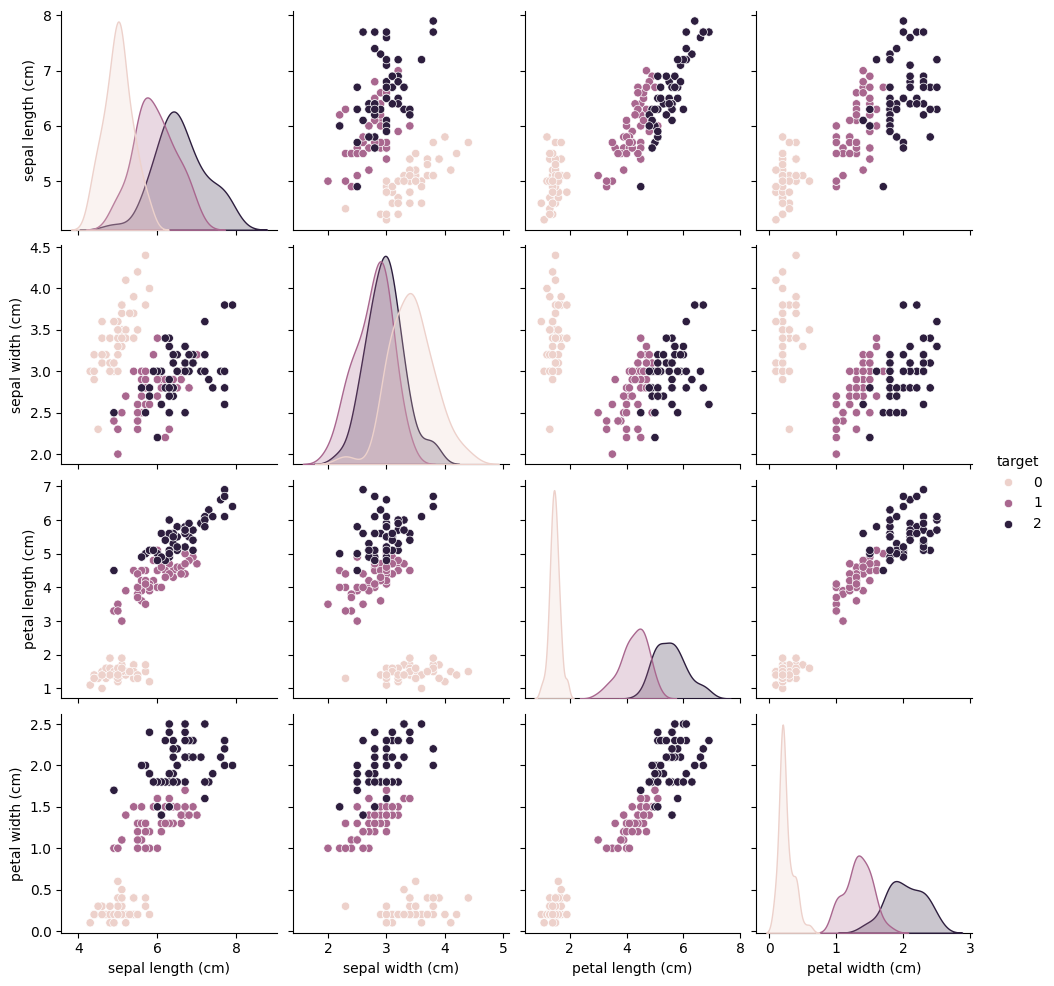

In [289]:
visualized_dataset = sns.pairplot(dataset, hue = "target")

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[target]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[target]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[target]'>]],
      dtype=object)

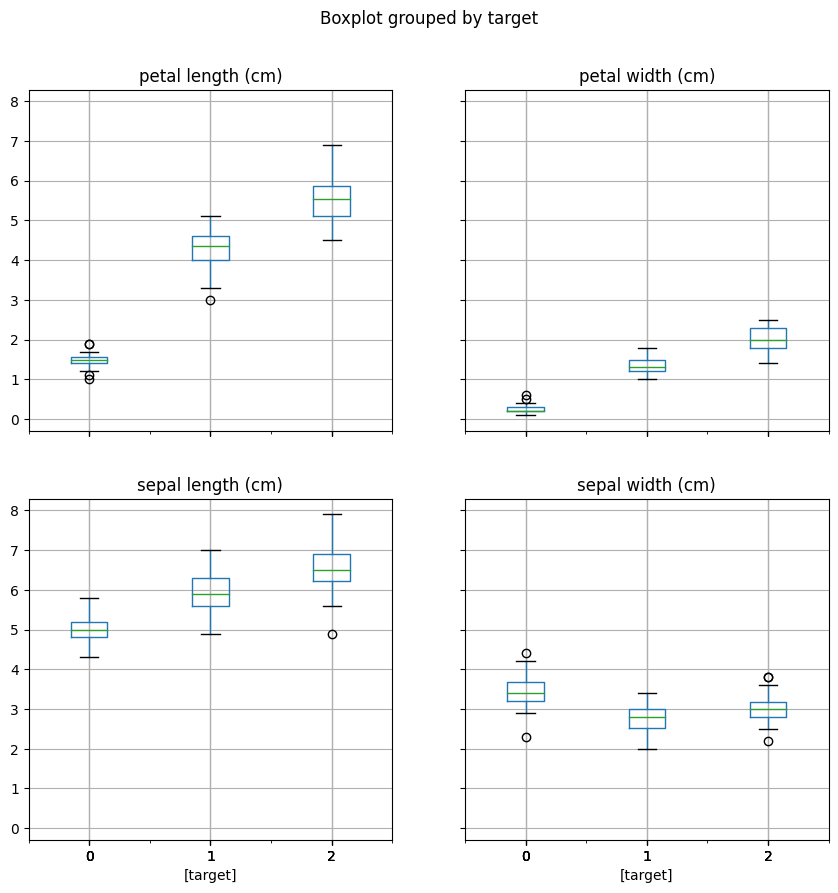

In [290]:
# Largest flower species?
dataset.boxplot(by= "target", figsize=(10,10))

<Axes: >

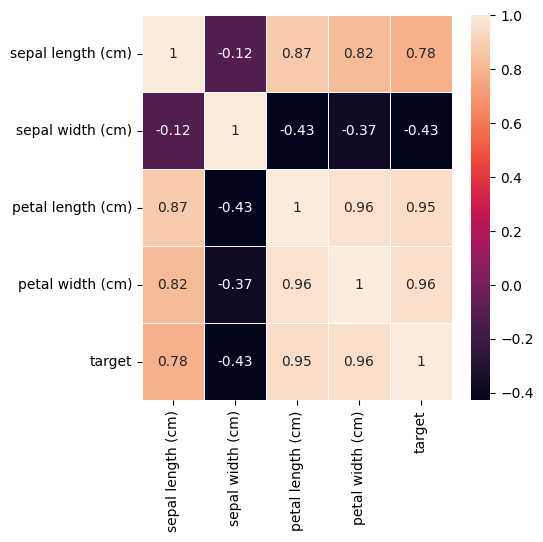

In [291]:
correlation = dataset.corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlation, annot = True, linewidth=.5)

### **Standardizing dataset**

In [292]:
column_features = ["petal width (cm)", "petal length (cm)", "sepal width (cm)", "sepal length (cm)"]
petal_sepal_dataset = dataset[column_features]

In [293]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_dataset = sc.fit_transform(petal_sepal_dataset)

### **PCA**

In [294]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_dataset = pca.fit_transform(scaled_dataset)

In [295]:
pca_dataset

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [296]:
pca_df = pd.DataFrame(pca_dataset, columns = ["PC1", "PC2"])
pca_df

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


<Axes: xlabel='PC1', ylabel='PC2'>

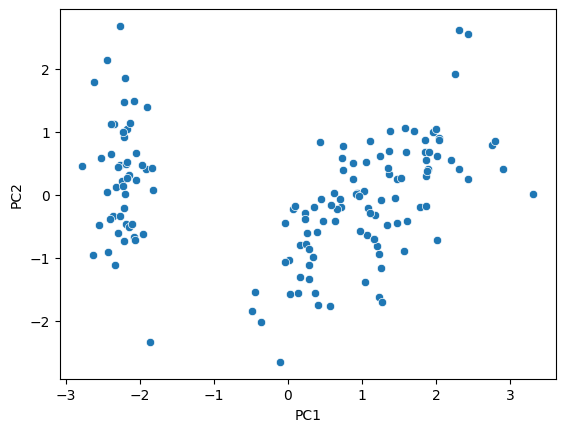

In [297]:
sns.scatterplot(data=pca_df, x="PC1", y="PC2")

### **Elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

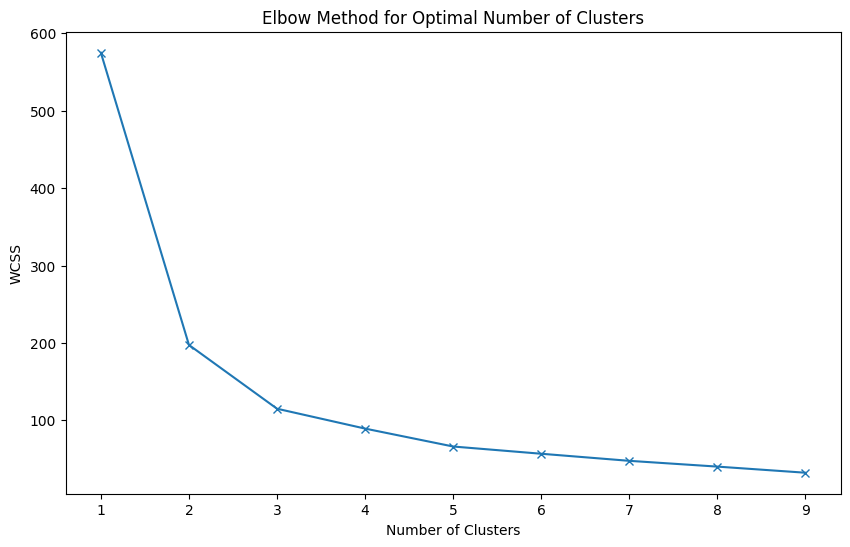

In [298]:
from sklearn.cluster import KMeans

WCSS = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init= "k-means++")
    kmeans.fit(pca_df)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), WCSS, marker='x')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### **KMeans**

In [299]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = "k-means++")
kmeans_clusters = kmeans.fit_predict(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


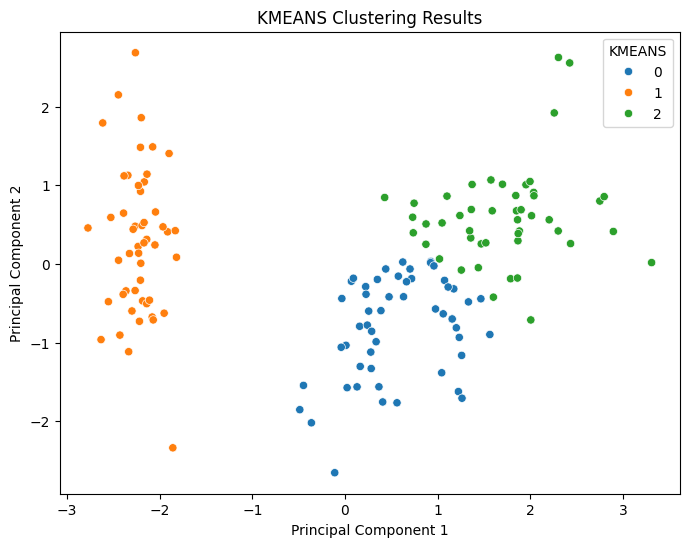

In [300]:
# visualize results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=kmeans_clusters, palette='tab10', legend='full')
plt.title('KMEANS Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='KMEANS')
plt.show()

### **Gaussian Mixture Model**

In [301]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(pca_df)
gmm_clusters = gmm.predict(pca_df)

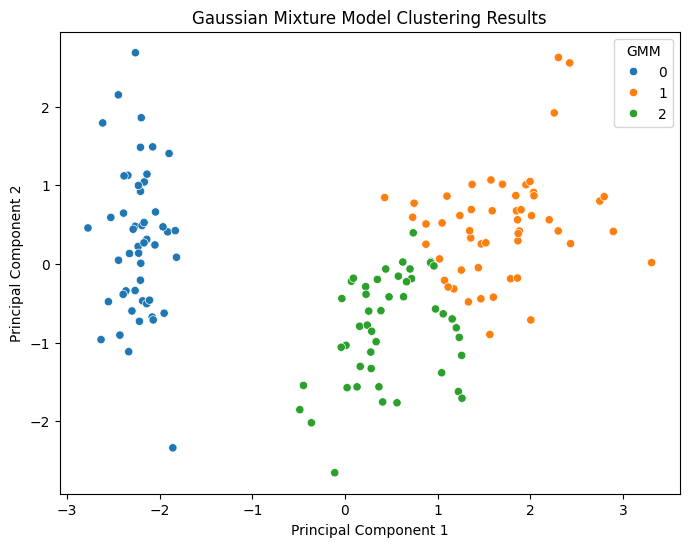

In [302]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=gmm_clusters, palette='tab10', legend='full')
plt.title('Gaussian Mixture Model Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='GMM')
plt.show()

### **External Evaluation Metrics**

In [303]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

In [304]:
# Calculate evaluation metrics
def evaluation_function(ground_truth, clustering_algorithm):

    hom_score = homogeneity_score(ground_truth, clustering_algorithm)
    com_score = completeness_score(ground_truth, clustering_algorithm)
    v_measure = v_measure_score(ground_truth, clustering_algorithm)
    adjusted_rand = adjusted_rand_score(ground_truth, clustering_algorithm)

    print("Homogeneity Score:", hom_score)
    print("Completeness Score:", com_score)
    print("V-Measure:", v_measure)
    print("Adjusted Rand Index:", adjusted_rand)

In [305]:
ground_truth = dataset["target"]

In [306]:
print("KMeans")
evaluation_function(ground_truth, kmeans_clusters)

KMeans
Homogeneity Score: 0.659126501804901
Completeness Score: 0.659847677962776
V-Measure: 0.659486892724918
Adjusted Rand Index: 0.6201351808870379


In [307]:
print("GMM")
evaluation_function(ground_truth, gmm_clusters)

GMM
Homogeneity Score: 0.6966166968107065
Completeness Score: 0.6969551315736722
V-Measure: 0.6967858730970387
Adjusted Rand Index: 0.6757362582358094
